<a href="https://colab.research.google.com/github/reshminambiar/DW15_Task6/blob/main/Assignment8_Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

Reading the file and exploring the data

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.shape

(804, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [ ]:
df[['Liter','Mileage']].describe()

,Liter,Mileage
count,804.000000,804.000000
mean,3.037313,19831.934080
std,1.105562,8196.319707
min,1.600000,266.000000
25%,2.200000,14623.500000
50%,2.800000,20913.500000
75%,3.800000,25213.000000
max,6.000000,50387.000000


In [ ]:
df['Make'].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [ ]:
df['Model'].nunique()

32

In [ ]:
df['Model'].value_counts()

Malibu         60
AVEO           60
Cavalier       60
Ion            50
Cobalt         50
9_3 HO         40
Vibe           30
Bonneville     30
Monte Carlo    30
Lacrosse       30
Impala         30
Grand Prix     30
9_5            30
Deville        30
Lesabre        20
Corvette       20
9_3            20
9_5 HO         20
G6             20
Grand Am       20
Park Avenue    20
Sunfire        10
Century        10
GTO            10
Classic        10
XLR-V8         10
STS-V8         10
STS-V6         10
CTS            10
CST-V          10
L Series       10
9-2X AWD        4
Name: Model, dtype: int64

In [ ]:
df['Trim'].value_counts()

Sedan 4D               170
Coupe 2D                50
LS Sedan 4D             50
LT Sedan 4D             30
LS Coupe 2D             30
Quad Coupe 2D           20
SE Sedan 4D             20
Arc Sedan 4D            20
GT Sedan 4D             20
Aero Sedan 4D           20
Linear Wagon 4D         14
SLE Sedan 4D            10
GT Coupe 2D             10
GTP Sedan 4D            10
AWD Sportwagon 4D       10
Linear Conv 2D          10
GT Sportwagon           10
Sportwagon 4D           10
SS Coupe 2D             10
Linear Sedan 4D         10
Aero Conv 2D            10
Arc Conv 2D             10
Arc Wagon 4D            10
Aero Wagon 4D           10
GXP Sedan 4D            10
LT MAXX Hback 4D        10
LT Coupe 2D             10
LS Hatchback 4D         10
CXL Sedan 4D            10
CXS Sedan 4D            10
Custom Sedan 4D         10
Limited Sedan 4D        10
Special Ed Ultra 4D     10
DHS Sedan 4D            10
DTS Sedan 4D            10
Hardtop Conv 2D         10
LT Hatchback 4D         10
M

In [ ]:
df['Type'].value_counts()

Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64

In [ ]:
df['Cylinder'].value_counts()

4    394
6    310
8    100
Name: Cylinder, dtype: int64

In [ ]:
df['Doors'].value_counts()

4    614
2    190
Name: Doors, dtype: int64

In [ ]:
df['Cruise'].value_counts()

1    605
0    199
Name: Cruise, dtype: int64

In [ ]:
df['Sound'].value_counts()

1    546
0    258
Name: Sound, dtype: int64

In [ ]:
df['Leather'].value_counts()

1    582
0    222
Name: Leather, dtype: int64

Task 1

In [ ]:
#Creating a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df['Mileage'].values.reshape(-1,1)
Y = df['Price'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model.intercept_, model.coef_))

Intercept:[24764.55900606] ,Coefficients:[[-0.1725205]]


In [ ]:
eq = "y = {}*x  + {}".format(model.coef_[0],model.intercept_)
print("The linear equation for the data is \n",eq)

The linear equation for the data is 
 y = [-0.1725205]*x  + [24764.55900606]


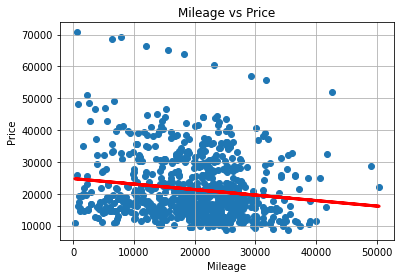

In [ ]:
#2. Plotting the original data and the regression line
plt.scatter(X,Y)
plt.plot(X, model.predict(X), color="red", linewidth=3)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs Price")
plt.grid()
plt.show()

In [ ]:
model.score(X,Y) #3. r2 score of the model

0.02046344732348926

Task 2

In [ ]:
# Taking these seven columns for model building
input_cols = ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
X = df[input_cols]

In [ ]:
# I thought it would be better to normalize/standardize inputs as their ranges are far apart.
from sklearn.preprocessing import StandardScaler,MinMaxScaler
func1 = MinMaxScaler(feature_range = (0,1))
func2 = StandardScaler()
X_norm = func1.fit_transform(X)
func2.fit(X)
X_stand = func2.transform(X) 

In [ ]:
#Creating a linear regression model without normalization/standardization of inputs
Y = df['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model1.intercept_, model1.coef_))
model1.score(X,Y)

Intercept:[6758.7551436] ,Coefficients:[[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


0.4462643536728379

In [ ]:
#Creating a linear regression model with standardized inputs
Y = df['Price'].values.reshape(-1,1)
model2 = LinearRegression()
model2.fit(X_stand,Y)
print("Intercept:{} ,Coefficients:{}".format(model2.intercept_, model2.coef_))
model2.score(X_stand,Y)

Intercept:[21343.14376733] ,Coefficients:[[-1390.44199315  5258.77092032  -869.77988086 -1310.7785287
   2714.12330837  -930.74494929  1497.42117515]]


0.446264353672838

In [ ]:
#Creating a linear regression model with normalized inputs
Y = df['Price'].values.reshape(-1,1)
model3 = LinearRegression()
model3.fit(X_norm,Y)
print("Intercept:{} ,Coefficients:{}".format(model3.intercept_, model3.coef_))
model3.score(X_norm,Y)

Intercept:[17538.07307995] ,Coefficients:[[-8507.93110436 15169.51572313 -3463.77121919 -3085.49169276
   6288.99714985 -1993.7952757   3349.36161961]]


0.446264353672838

Here we can see that normalization/standardization have no effect on the model score in this case.We get 0.446 r2_score with the combination of these inputs which is not very great.

In [ ]:
#Function to get all combinations of input columns
import itertools as it
def input_combos(cols):
    return [it.combinations(cols, n+1) for n in range(len(cols))]

In [ ]:
combos = input_combos(input_cols)

In [ ]:
#Creating a model for each combination and returning the r2 scores
def combo_r2scores( all_combos, df, output='Price'):
    combo_scores = {}
    for i in range(len(list(all_combos))):
        for j in list(all_combos[i]):
            X = df[list(j)]
            Y = df['Price']
            model = LinearRegression().fit(X,Y)
            combo_scores[model.score(X,Y)] = j
    return combo_scores

In [ ]:
combo_r2scores(combos,df,'Price')

{0.015462387624189389: ('Sound',),
 0.019251466591467037: ('Doors',),
 0.02046344732348926: ('Mileage',),
 0.024710851264124534: ('Leather',),
 0.03688121596735017: ('Mileage', 'Sound'),
 0.03701628770903431: ('Doors', 'Sound'),
 0.04039914867118721: ('Mileage', 'Doors'),
 0.04141817346866039: ('Doors', 'Leather'),
 0.04521956340886857: ('Mileage', 'Leather'),
 0.04795369092082724: ('Sound', 'Leather'),
 0.05925054392042661: ('Mileage', 'Doors', 'Sound'),
 0.06256392121987697: ('Mileage', 'Doors', 'Leather'),
 0.06687313316188848: ('Doors', 'Sound', 'Leather'),
 0.06965940622436506: ('Mileage', 'Sound', 'Leather'),
 0.08933709379370725: ('Mileage', 'Doors', 'Sound', 'Leather'),
 0.1856330092969276: ('Cruise',),
 0.19288948066869627: ('Cruise', 'Sound'),
 0.1996382468921617: ('Doors', 'Cruise'),
 0.2083536888853531: ('Doors', 'Cruise', 'Sound'),
 0.2093138558315859: ('Mileage', 'Cruise'),
 0.21721656906779274: ('Mileage', 'Cruise', 'Sound'),
 0.2210042052179847: ('Cruise', 'Leather'),
 

Combination of all 7 input fields produce the highest r2 score of 0.446

##Task 3

In [ ]:
df1 = df.copy()

In [ ]:
#As we have more than 40 categories in these 3 columns I wanted to try label encoding
df1[['Make','Model','Type']] = df1[['Make','Model','Type']].astype('category')
df1.dtypes

Price        float64
Mileage        int64
Make        category
Model       category
Trim          object
Type        category
Cylinder       int64
Liter        float64
Doors          int64
Cruise         int64
Sound          int64
Leather        int64
dtype: object

In [ ]:
df1['Make'] = df1['Make'].cat.codes
df1['Model'] = df1['Model'].cat.codes
df1['Type'] = df1['Type'].cat.codes

In [ ]:
df1

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,Sedan 4D,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,5,21,L300 Sedan 4D,3,6,3.0,4,1,0,0
800,16175.957604,19095,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
801,15731.132897,20484,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
802,15118.893228,25979,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0


In [ ]:
# Taking these seven columns for model building
input_cols = ['Mileage','Cylinder','Make','Model','Type','Liter','Doors','Cruise','Sound','Leather']
X = df1[input_cols]
Y = df1['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model1.intercept_, model1.coef_))
model1.score(X,Y)

Intercept:[3039.64350271] ,Coefficients:[[-1.71673657e-01  4.87578755e+03  8.32075788e+02 -2.05034394e+02
   4.31124572e+01 -8.92252597e+02 -1.50175555e+03  5.14099964e+03
  -1.33287926e+03  2.77089529e+03]]


0.48569139005488515

In [ ]:
combos = input_combos(input_cols)

In [ ]:
def combo_r2scores( all_combos, df, output='Price'):
    combo_scores = {}
    for i in range(len(list(all_combos))):
        for j in list(all_combos[i]):
            X = df[list(j)]
            Y = df['Price']
            model = LinearRegression().fit(X,Y)
            combo_scores[model.score(X,Y)] = j
    return combo_scores

In [ ]:
output_dict = combo_r2scores(combos,df1,'Price')

In [ ]:
max(output_dict)

0.48569139005488515

In [ ]:
output_dict[0.48569139005488515] #This combination gives the maximum r2_score

('Mileage',
 'Cylinder',
 'Make',
 'Model',
 'Type',
 'Liter',
 'Doors',
 'Cruise',
 'Sound',
 'Leather')

There is no considerable improvement in the model score with label encoding of make,model and type.It just increased from 0.44 to 0.48

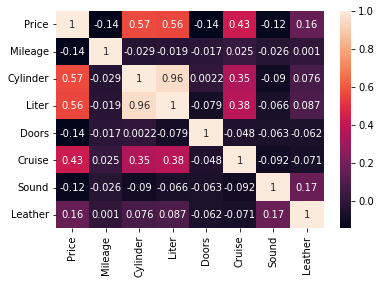

In [ ]:
sns.heatmap(df.corr(), annot=True) #Cylinder and Liter are highly positively correlated

##Final

In [ ]:
df1 = df.copy()

In [ ]:
#We have 32 unique categories in the Model field.I think I should do label encoding rather than one-hot encoding
df1['Model'] = df1['Model'].astype('category')
df1['Model'] = df1['Model'].cat.codes

In [ ]:
#One-hot encoding for Make and Type
df_dummies = pd.get_dummies(df1, columns = ['Make','Type'])

In [ ]:
input_cols=['Mileage', 'Cylinder','Liter','Model','Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']

In [ ]:
X = df_dummies[input_cols]

In [ ]:
Y = df['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model1.intercept_, model1.coef_))
model1.score(X,Y)

Intercept:[23377.98090878] ,Coefficients:[[-1.84575188e-01 -1.25812618e+03  5.68575195e+03  5.86830951e+01
  -2.09123334e+03  1.81499295e+02  2.05060415e+02  2.89961148e+02
  -3.96158031e+03  1.22141649e+04 -5.27969841e+03 -5.52735103e+03
   7.75088755e+03 -5.19642271e+03  6.49494131e+03 -5.44932464e+03
  -1.57653214e+03 -1.46170953e+03  1.99262500e+03]]


0.9376502168807379

Here we get a model r2 score of 0.937 which is good.

One last time, I want to try without the label encoded 'Model' field.

In [ ]:
df_dummies = pd.get_dummies(df1, columns = ['Make','Type'])

In [ ]:
input_cols=['Mileage', 'Cylinder','Liter','Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']

In [ ]:
X = df_dummies[input_cols]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
Y = df['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model1.intercept_, model1.coef_))
model1.score(X,Y)

Intercept:[23983.77190962] ,Coefficients:[[-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
   1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
   1.22732515e+04 -5.33495094e+03 -5.47974129e+03  6.95098389e+03
  -4.82285042e+03  6.52818455e+03 -5.49471851e+03 -1.71994175e+03
  -1.69110942e+03  2.37758514e+03]]


0.9363889951039477

There is only 0.001 difference in the r2_score if we use "Model" field.

###Conclusion

The combination of 'Mileage', 'Cylinder','Liter','Doors', 'Cruise','Sound','Leather','Make' and 'Type' is best combination of features for the linear regression model.